# Our Project 

Hip-hop and rap are genres that have had unprecedented origin and evolution in the past forty years. “Hip-Hop Evolution” is a documentary series that does an incredible job in tracking these origins and early manifestations. It cites that hip-hop and rap's narrative starts in the Southern Bronx of New Year City and follows the largest visionaries and musical innovators of the time up until 1994 when rap officially enters the “mainstream". The documentary functions as an anthropological escapade, relying on interviews with a broad range of individuals involved in the genre’s creation. It pieces together a narrative that explains how rap and hip hop emerged as both a technological and sociological innovation-- analyzing lyrical themes from the beginning, as rap was first created for the exclusive purpose of party entertainment in the late 1970s, to how it became a medium for proposing commentary and reflection on the reality of poor neighborhoods and being Black American in the early 1990s. Though we believe the documentary has done an impressive job in tracing rap and hip-hop's origins, our project is interested in investigating the evolution of the genre after the series ends. 

#### We want to know how has rap and hip-hop has evolved since it entered the mainstream? How does this differ from its underground roots? And what sociological events have motivated recent modifications?

### Our hypothesis 

Many individuals today would argue that rap and hip-hop is a genre that has always been concerned with commenting and reflecting on reality. The "Hip-Hop Evolution" cites that this is not necessarily true, reflection was something that had to be developed in rap, as the genre first manifested as a product of disco and partying. 

In rap's origins, MCs dominated the social scene by writing music about partying and women to subsequently assert their status in the community. After the song, “The Message” by Grandmaster Flash and The Furious Five came out in 1982, rap and hip-hop saw a glimpse of what lyrical topics in the coming decade would discuss. The 1980s was a dynamic and difficult time for urban America, especially for impoverished black communities. Reaganomics, the emergence of crack, the War on Drugs, gang violence, and discrimination all had tremendous influence, and it was during this period that, for the first time, these issues began manifesting themselves in lyrics.  

Furthermore, as the documentary series comes to a close, it discusses how the popularity of rap and hip-hop was being spread throughout a variety of youth listeners in the United States. The heightened popularity seen in the early 1990s set presidency for a new type of rap and hip-hop, as rappers transitioned from underground artists to reaping the same fame and notoriety of pop stars. 

Give this consideration, we hypothesize that as rap and hip-hop entered the mainstream in the early 1990s, we will see a trend in lyrical content as it pivots away from the iteration of black American experiences, to more conventional themes seen in other popular music-- such as love/sex, fame, and status/power

#### We believe that this question is best answered through computational analysis because the computational analysis is faster and more thorough than hand-coding, and it will allow us the ability to look at an extensive corpus (80% of commercially successful hip-hop and rap songs in the past two decades).  


# Exploration Through What Means

Our project first starts with topic-modeling, as we are looking to corroborate the themes noted throughout the documentary film “Hip-Hop Evolution”. Unfortunately, we are not able to analyze many rap or hip-hop lyrics from before 1989 to truly test the documentary's findings. This is because most of the lyrics were never publish or transcribed online. Nevertheless, the corpus we have collected will reflect an accurate measure in how our interpreted categories have increased and decreased since hip-hop and rap entered the mainstream. 

After this, we will be examining the more specific elements of our categories by comparing changes in particular words over time. We will be relying on LIWC dictionaries that have categories associated with our analysis from the topic-modeling computation to conduct a dictionary method analysis. We acknowledge that this process has a potential for bias, in that involves speculative assumption that our interpreted topic modeling categories are correct, and that they relate to the LIWC dictionaries provided. 

Throughout these computational processes, we will be supplementing our findings on the evolution of mainstream rap and hip-hop with analysis and theoretical explanations. We found the year 2013 to be of particular interest, as we speculate that the sociological influence of the Black Lives Matter movement had influencial effects on rap and hip-hop lyrics. We test this through various similar and concordance tests. 

![title](../images/binary_number_system.png)

In [1]:
#### Helper functions ####

def get_similar_words(year, word, n_words):
    tokens = list(itertools.chain.from_iterable(lyrics_df[lyrics_df['year'] == year]['tokens_lower_clean'].tolist()))
    text_object = nltk.Text(tokens)
    text_object.similar(word, num = n_words)
    
def get_concordance(year, word, n_lines):
    tokens = list(itertools.chain.from_iterable(lyrics_df[lyrics_df['year'] == year]['tokens_lower_clean'].tolist()))
    text_object = nltk.Text(tokens)
    text_object.concordance(word, lines=n_lines)
    
    
### Dictionary Helpers ###

#Function that returns the dictionary that we want to investigate
def get_dict(df, label):
    df_dict =  df[lambda df: [column for column in df.columns if re.match(label + "*", column)]]
    words = []
    cols = df_dict.columns
    for col in cols:
        words += df_dict[col].tolist()

    return [word for word in words if str(word) != "nan"]

# Returns the number of words in a song that intersect with a dictionary.
def dict_count(tokens, dictionary):
    count = 0
    for token in tokens:
        for word in dictionary: 
            if word[-1] =='*':
                search_string=word[0:-1]
                if re.match(search_string, token):
                    count += 1
                    #print(token)
                    #print(word)
            else:
                if word == token:
                    count += 1
                    #print(token)
                    #print(word)
    return count

In [2]:
import pandas
from ast import literal_eval
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import string
import re
import itertools


#read the dictionary words into a Pandas dataframe
dict_df = pandas.read_csv("../data/LIWC2015-dictionaries.csv", encoding='utf-8', header=3)

lyrics_df = pandas.read_csv("../data/bbtop15-lyrics-tokenized.csv",converters={'tokens_lower':literal_eval, 'tokens_lower_clean':literal_eval, "tokens_lower_clean_stopfree_stem": literal_eval } )

#drop rows where the text is missing.
lyrics_df  = lyrics_df.dropna(subset=['lyrics'])

# Join stems back into list
lyrics_df['lyrics_stemmed'] = lyrics_df['tokens_lower_clean_stopfree_stem'].apply(lambda x: " ".join(x))

# Add token count col
lyrics_df['token_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: len(x))
lyrics_df

,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_lower,tokens_lower_clean,tokens_lower_clean_stopfree,tokens_lower_clean_stopfree_stem,lyrics_stemmed,token_count
0,0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\...","\n\n\n""Whatll we get for 10 dollars?""\n""Every ...","['""Whatll', 'we', 'get', 'for', '10', 'dollars...","[""whatll, we, get, for, 10, dollars?"", ""every,...","[whatll, we, get, for, 10, dollars, every, tin...","['whatll', 'get', 'dollars', 'every', 'ting', ...","[whatll, get, dollar, everi, ting, want, every...",whatll get dollar everi ting want everyth ever...,342
1,1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...,\n\n\nBust it\n\n\nThis heres a jam for all th...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","[bust, it, this, heres, a, jam, for, all, the,...","[bust, it, this, heres, a, jam, for, all, the,...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l...","[bust, here, jam, fella, tryin, ladi, tell, us...",bust here jam fella tryin ladi tell us get sho...,621
2,2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu...","\n\n\nWell excuse me, take a few minutes, to m...","['Well', 'excuse', 'me,', 'take', 'a', 'few', ...","[well, excuse, me,, take, a, few, minutes,, to...","[well, excuse, me, take, a, few, minutes, to, ...","['well', 'excuse', 'take', 'minutes', 'mellow'...","[well, excus, take, minut, mellow, big, daddi,...",well excus take minut mellow big daddi kane mi...,410
3,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,\n\n\n\nYou can cha-cha-cha to this Mardis Gra...,"['You', 'can', 'cha-cha-cha', 'to', 'this', 'M...","[you, can, cha-cha-cha, to, this, mardis, gras...","[you, can, chachacha, to, this, mardis, gras, ...","['chachacha', 'mardis', 'gras', 'im', 'dopest'...","[chachacha, mardi, gras, im, dopest, femal, yo...",chachacha mardi gras im dopest femal youv hear...,420
4,4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...,\n\n\nI go to work like a doctor\nWhen I rock ...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","[i, go, to, work, like, a, doctor, when, i, ro...","[i, go, to, work, like, a, doctor, when, i, ro...","['go', 'work', 'like', 'doctor', 'rock', 'mic'...","[go, work, like, doctor, rock, mic, got, like,...",go work like doctor rock mic got like way oper...,695
5,5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","['Yo', 'Wreckx-N-Effect', 'In', 'full', 'effec...","[yo, wreckx-n-effect, in, full, effect!, (""wor...","[yo, wreckxneffect, in, full, effect, word, up...","['yo', 'wreckxneffect', 'full', 'effect', 'wor...","[yo, wreckxneffect, full, effect, word, know, ...",yo wreckxneffect full effect word know need kn...,361
6,6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...,\n\n\nYo! My Lone Mixer\nYou ready?\nBust it!\...,"['Yo!', 'My', 'Lone', 'Mixer', 'You', 'ready?'...","[yo!, my, lone, mixer, you, ready?, bust, it!,...","[yo, my, lone, mixer, you, ready, bust, it, lo...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone...","[yo, lone, mixer, readi, bust, lone, mixer, sa...",yo lone mixer readi bust lone mixer sampl scra...,147
7,7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...,\n\n\nHave you ever met a girl that you tried ...,"['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","[have, you, ever, met, a, girl, that, you, tri...","[have, you, ever, met, a, girl, that, you, tri...","['ever', 'met', 'girl', 'tried', 'date', 'year...","[ever, met, girl, tri, date, year, make, love,...",ever met girl tri date year make love want wai...,663
8,8,It's Funky Enough,The D.O.C.,Male,1989-11-04,

In [3]:
## Update columns of the Dictionary data frame
new_columns =['Function1', 'Function2', 'Function3', 'Function4', 'Pronoun', 'Ppron', 'I', 'We', 'You', 'SheHe', 'They', 'Ipron', 'Article', 'Prep', 'Auxverb', 'Adverb', 'Conj', 'Negate', 'Verb1', 'Verb2', 'Verb3', 'Verb4', 'Verb5', 'Verb6', 'Verb7', 'Adj1', 'Adj2', 'Adj3', 'Adj4', 'Adj5', 'Compare', 'Unnamed: 31', 'Unnamed: 32', 'Interrog', 'Number', 'Quant', 'Affect', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Posemo1', 'Posemo2', 'Posemo3', 'Posemo4', 'Posemo5', 'Negemo1', 'Negemo2', 'Negemo3', 'Negemo4', 'Negemo5', 'Anx', 'Anger1', 'Anger2', 'Sad', 'Social', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Family', 'Friend', 'Female', 'Male', 'CogProc', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Insight1', 'Insight2', 'Cause', 'Discrep', 'Tentat', 'Unnamed: 80', 'Certain', 'Differ', 'Percent', 'Unnamed: 84', 'Unnamed: 85', 'See', 'Hear', 'Feel', 'Bio', 'Unnamed: 90', 'Unnamed: 91', 'Unnamed: 92', 'Unnamed: 93', 'Body1', 'Body2', 'Health1', 'Health2', 'Sexual', 'Ingest1', 'Ingest2', 'Drives1', 'Drives2', 'Drives3', 'Drives4', 'Drives5', 'Drives6', 'Drives7', 'Drives8', 'Affiliation1', 'Affiliation2', 'Achieve1', 'Achieve12', 'Power1', 'Power2', 'Power3', 'Power4', 'Reward', 'Risk', 'FocusPast', 'Unnamed: 120', 'Unnamed: 121', 'FocusPresent', 'Unnamed: 123', 'Unnamed: 124', 'FocusFuture', 'Relativ', 'Unnamed: 127', 'Unnamed: 128', 'Unnamed: 129', 'Unnamed: 130', 'Unnamed: 131', 'Unnamed: 132', 'Motion', 'Unnamed: 134', 'Unnamed: 135', 'Space', 'Unnamed: 137', 'Unnamed: 138', 'Time', 'Unnamed: 140', 'Work1', 'Work2', 'Work13', 'Leisure1', 'Leisure2', 'Home', 'Money1', 'Money2', 'Relig', 'Unnamed: 150', 'Death', 'Informal1', 'Informal2', 'Informa3', 'Swear', 'Netspeak1', 'Netspeak2', 'Assent', 'Nonflu', 'Filler'] 
new_columns = [column.lower() for column in new_columns]
dict_df.columns = new_columns


# Background on the Corpus 

We composed our corpus of rap lyrics by first making a list of all the rap songs that have appeared on the Billboard Hot Rap Songs list from 1989-2016 (http://www.billboard.com/charts/rap-song).

To get the lyrics, we wrote a script that scraped 2317 lyrics from the well-established lyrics site Rap Genius(https://genius.com). That is about 81% of all the songs that appears on the list during the specified time period. The figure bellow illustrated how the lyrics are distributed across time. Our corpus also necessitated computational cleaning in removing variables such as uppercase letters, punctuation, etc.. 

This data collection functions as an appropriate selection for our investigation as we are interested in tracking how **recent** manifestations of hip-hop and rap have evolved as (A) a product of being in the **mainstream** (hence why we selected Billboard Hot Rap Songs), and (B) through modern sociological conditions of the time (we wanted to study influences after 1994, where hip-hop and rap historically has entered the mainstream). 

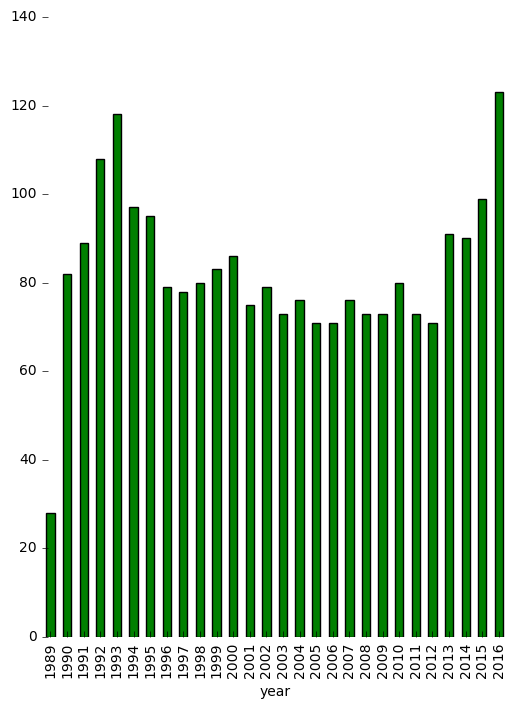

In [26]:
grouped_year = lyrics_df.groupby("year")
grouped_year['lyrics'].count().plot(kind = 'bar', color='green')
plt.show()

# I. Topic Modeling of Notable Themes

In this section, we are interested in noting some of what computational analysis will prescribe as the most notable themes in recent, mainstream rap and hip-hop. We decide to define the corpus with six topics in order to get a distinct range of topics and to account for unusual phrasing, slang, and errors in tokenizing the unique syntax of rap and hip-hop lyrics. In this section, we are partially looking to validate previous research that suggests partying, women, violence/gangs, and status were notable themes in the foundations of rap and hip-hop before 1994.

In [14]:
####Adopted From: 
#Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

n_samples = 2317
n_topics = 6
n_top_words = 80

##This is a function to print out the top words for each topic in a pretty way.
#Don't worry too much about understanding every line of this code.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [15]:
print("Extracting tf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=70, max_features=None,
                                   stop_words="english")

tfidf = tfidf_vectorizer.fit_transform(lyrics_df.lyrics_stemmed)

Extracting tf features for NMF...


In [16]:
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d ..."
      % (n_samples))
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)



Fitting the NMF model with tf-idf features, n_samples=2317 ...


In [17]:
print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model:

Topic #0:
im know got like girl dont babi let aint yeah want caus wanna say time right make need tell come man feel way gotta good thing said look think ya life day night money boy ill hey gonna realli everi work tri talk friend littl bodi em mind gon ride world play bout gone wont bad imma home someth real game long better fli alway uh damn told stop hand turn ive hit new tonight away live shake hard walk

Topic #1:
nigga bitch fuck shit money ass im yall got like aint hoe dont motherfuck fuckin pussi dick em real gon hood know street ho dog smoke big rich gun wit thug stay club hit hundr bout die young boy yeah yo new bad look game pull kill motherfuckin lil ball ya run imma ride blow pop bust gettin make citi watch talkin talk shoot block head shot catch straight dope weed dollar white live life million chain til car drop

Topic #2:
like im yo rhyme ya caus mic rock style funki rap em funk yall come check lyric make shit mcs word dont man wit flow beat brother

In [18]:
#Add topic score for each song 
topic_dist = nmf.transform(tfidf)
topic_dist_df = pandas.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(lyrics_df)

#Add stem count for each song. 
df_w_topics['stem_count'] = df_w_topics['tokens_lower_clean_stopfree_stem'].apply(lambda x: len(x))

topic_columns = range(0,6)
col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_w_topics[col] = df_w_topics[num] * df_w_topics['stem_count']
    

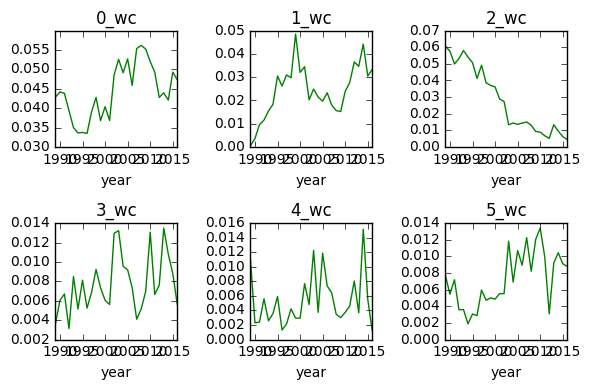

In [27]:
#Plot change in topics ocer time

grouped_year = df_w_topics.groupby('year')
fig3 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig3.add_subplot(2,3, chrt)
    (grouped_year[e].sum()/grouped_year['stem_count'].sum()).plot(kind='line', title=e, color='green')
    
fig3.tight_layout()
plt.show()

## Analysis on Topic Modeling 

Our interpretation of the six topics we found evidence for include: 
- Topic 0: "Sex and Love"
- Topic 1: "Social Gatherings and Celebration" 
- Topic 2: "Appeal for Status" 
- Topic 3: "Assertion of Power" 
- Topic 4: "Coquettish Rhetoric" 
- Topic 5: "Gangs, Ghettos, and Violence".

These topics have shifted slightly since the first time we attempted this same analysis. This is because we cleaned up the corpus by stemming the lyrics, removing stop words/digits/etc., and using a tf-idf vectorizer. 

Insofar as verifying our previous research into rap and hip-hop lyrical themes, this computational method supports the suggestions taken from the "Hip-Hop Evolution" documentary that suggests that much of the lyrical inspiration has come from partying, women, and the reality of black, urban neighborhoods. If our hypothesis (that rap and hip-hop have reflected less meaningful content as it is increasingly commercialized) is correct, we should see increases in lyrical reference to all of the topics over time, except for Topic 5. We interpret Topic 5 to be a product of the reminiscence of "gangster rap". According to the "Evolution of Hip-Hop", gangster rap was a style of rap/hip-hop that had its origins in California in the late 80s and was popularized by groups such as Ice-T, Dr. Dre, and NWA. 

We would like to take this analysis a step further my examining specific topics. This leads us to Part II of our project. 

# II. Examining Specific Topics Through LIWC

In this section, we will be examining some of the most notable themes that surfaced through our previous research and topic modeling. Though we went through several prototypes in how to best do this investigation, we decided that we will be relying on LIWC dictionaries. 

As a result of this reliance, the themes that we will be looking into are products of the LIWC preexisting categories. The relevant categories we found include: money, power, sex, anger, leisure, swear words, and insight. We choose these categories by looking at overlaps of the words cited in topic modeling and in the LIWC dictionary index. We acknowledge that dictionary methods and their subsequent interpretation carry some inherent biases. 

 ## Investigation on Money

In [20]:
money_dict = get_dict(dict_df, "money")

In [21]:
lyrics_df['money_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, money_dict))

In [23]:
lyrics_df['money_ratio'] = lyrics_df['money_count'] / lyrics_df['token_count']

In [24]:
groupedby_year = lyrics_df.groupby('year')

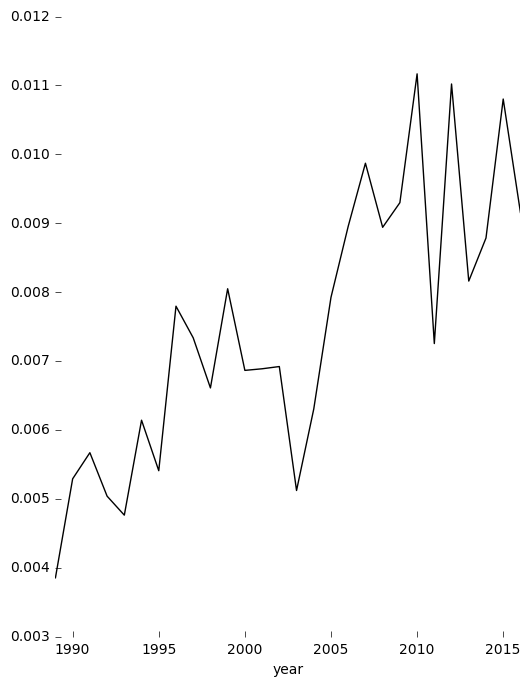

In [29]:
groupedby_year['money_ratio'].mean().plot(kind='line',color='black')
plt.show()

plt.figure(figsize=(6, 8))   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

## Analysis on Money:

As a general trend, it is clear that money has become a more popularized lyric topic over time. Though we can only speculate, our guess is that this is the consequence of rap and hip-hop entering the mainstream. We believe that by entering the mainstreams, rap and hip-hop artists reflect their reality in making and having more money and increasingly commercializing their products. 

### A Closer Look: Speculating on Sociological/Economic Influences 

Some of the interesting points in this graph include the dips of 2003, 2011, and 2013 and the peaks of 2010, 2012, and 2015. 

In researching possible mechanisms that may have influenced the first dramatic dip in 2003, we found that 2002 and 2003 saw dramatic increases in poverty and unemployment rates. Poverty increase 0.4% each year: 11.7% to 12.1% in 2002, and 12.5% from 12.1% in 2003 (Schuelke, 2003). This notable increase accounts for the 2.3 million individuals that fell into poverty during this two year period (CNN & Reuters, 2004). We hypothesize that this economic consideration had exacerbated effects in poor, urban neighborhoods-- which have been the cultural origins of rap and hip-hop. This economic trend has led us to believe that high poverty and unemployment rates do have an effect on the rap and hip-hop community. 

In considering the spike in 2010, we believe the high reference to money may be attributed to a bounce back from the 2008 recession. On September of 2010, the National Bureau of Economic Research stated that the US had officially left the recession in June of 2009, as the GDP had recovered to 70% of the pre-recession level (onthisday.com). We speculate that this economic trend may have had sparked inspiration for consumerist behavior and reference. 

This increase is sharply contrasted with a dip in 2011. In researching some of the possible explanations, we found that in May of 2011, the US Department of Labor cited that although more and more jobs were being created, there remained many regions in which unemployment had continued to grow. In fact, unemployment rates plateaued at 9% for most of the year. It is possible that this economic concern fueled what was to come later in the year, as in September the protests known as Occupy Wall Street emerged throughout the nation. As individuals began to protest the increasing wage gap between the top 1% and the middle class, it is likely that many musical artists may have paused their references to money and wealth accumulation. 

The spike in 2012 introduces another interesting pivot as it completely counters the 2011 drop. We speculate that this increase in lyrical reference to money could have been a product of economic stabilization, as unemployment rates steadily decreased. We also hypothesize that it could have had relation to Obama's reelected, as his candidacy stood as a powerful testament to the strength and success to many black American constituents. 

In 2013 we see another stark decrease, which we speculate could have been a musical response to the Black Lives Matter (BLM) movement. BLM started in the summer of 2013, and we proposed that it may have inspired a lyrical shift for some of the rap community to start a musical discussion of race and discrimination. 

 ## Investigation on Power 

In [146]:
power_dict = get_dict(dict_df, "power")

In [147]:
lyrics_df['power_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, power_dict))

In [148]:
lyrics_df['power_ratio'] = lyrics_df['power_count'] / lyrics_df['token_count']

In [151]:
groupedby_year = lyrics_df.groupby('year')

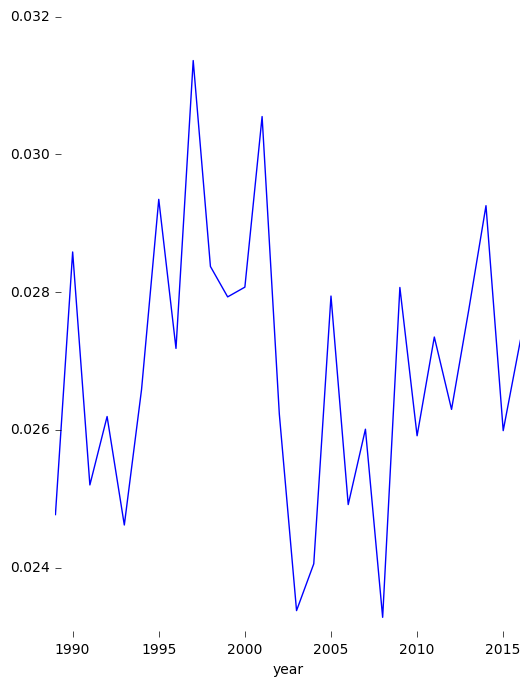

In [273]:
groupedby_year['power_ratio'].mean().plot(kind='line')
plt.show()

plt.figure(figsize=(6,8))   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

## Analysis on Power:

It is first worth acknowledging that the relevance of words associated with power is strikingly higher than those associated with money (power ranges from 0.022 - 0.032, money ranges from 0.004 - 0.011). Beyond that, as a general trend, power has kept a relatively stable general progression, though this graph clearly indicates notable peaks and valleys. We find it interesting that lyrical reference to rap has fluctuated with such steep slopes in the past twenty-five years, and even more so that power as a lyrical topic seems to be rarely affected in its introduction to the mainstream. We interpret the spike in the early 1990s to be a consequence of the emergence and popularization of "gangster rap". This graph seems to contradict our hypothesis, as we believed that reference to "gangs, ghettos, and violence" would decrease over time, and that subsequently so would assertions of power. Our surprise can be partially nullified in that it is possible that the LIWC dictionary of power is measuring references to power that exclude or are not exclusive to the words found in the "gangs, ghettos, and violence" topic modeling category. 


### A Closer Look: Speculating on Sociological Influences 

Some of the interesting trends in this graph that we would like to discuss include the dips of 2002/2003 and 2008 as well as the peaks of 1997 and 2001. 
 
In researching possible mechanisms that may have influenced the first dramatic peak in 1997, we speculated that assertions of power may have been affected by Bill Clinton's welfare reform initiative that ended Aid to Families with Dependent Children (AFDC) and started Temporary Assistance to Needy Families (TANF) in 1996. Both of these policies were and are regarded as "welfare" by the general public, but the different between the two is that TANF establishes much stronger work requirements, stricter limitations to aid, revoked welfare as an entitlement, and harbors racist,  heteronormative, and discriminative marital values (Graaf and Ratliff, 2017). This is seen in three of the four goals of TANF as they draw reference to a specific and idealized family formation, included in their the aims to: (A) "end of dependence of needy parents by promoting job preparation, work, and marriage"; (B) "prevent and reduce the incidence of out of wedlock pregnancies and establish annual numerical goals for preventing and reducing those pregnancies"; and (3) "encourage the formation and maintenance of two-parent families" (Graaf and Ratliff, 2017). Scholars suggest that such pointed goals were inherently racist and classist as they specifically targeted single mothers in impoverished communities (Graaf and Ratliff, 2017). We speculate that this policy shift could have inspired increase lyrical reference to power as a method of addressing the cultural repercussions of TANF, considering that the policy had dramatic influences on low-income communities of where rap and hip-hop were coming from. 

This trend of an increased reference of power is sharply contrasted with a dramatic dip in 2002 and 2003. In researching some of the possible explanations, we speculate that this could have been a lyrical response to the desolation that encompassed the nation after the 9/11 terrorist attacks in 2001. Immediately after the attacks, George W. Bush declared the "War on Terror" and in 2003 US invaded Iraq (Roberts, 2002). We speculate that such actions could have impacted the mainstream culture of the time, as much of American was uncertain and scared of the potential implications of the war. Furthermore, after the attack, American cultural perception saw increased rates of racism and discrimination, which we speculate may have additionally discouraged assertions of power and increased fear for all demographic (Lichtblau, 2016). 

Furthermore, we speculate that the deep decline of lyrical reference to power in 2008 may have been attributed to the stock market crash as a product of the housing crisis. The stock market crash occurred on September 29, 2008, as the Dow Jones Industrial Average fell 777.68 points in intra-day trading, which was the largest point drop in history (Amadeo, 2017). It had permeating effects through the US and world economy, and we speculate lyrical content may have responded to this panic with decrease reference in an assertion of power. Considering that there was widespread panic-- people were loosing homes, jobs, and life-savings-- we believe that the broad repercussions of the market crash would have caused musical artists in the mainstream to acknowledge the struggling country by tailoring their lyrics in reducing assertions of power. 

In 2013 we see another contrasting and stark increase in reference to power. Here we speculate that this could have been another lyrical response to the Black Lives Matter (BLM) movement. We believe that the LIWC dictionary would log words that are associated with the BLM movement as related to power considering that much of the movement was centered around empowering rhetoric. For example, the BLM website states that their ultimate goal is, "working to (re)build the Black liberation movement." The website cites the movement's foundation as a response to George Zimmerman's acquittal in 2013 after the death of Trayvon Martin, and that since then they have since made efforts to advertise the "experiences of Black people in this country who actively resist our dehumanization... #BlackLivesMatter is a call to action and a response to the virulent anti-Black racism that permeates our society. Black Lives Matter is a unique contribution that goes beyond extrajudicial killings of Black people by police and vigilantes" (Cullors, Garza, & Tometi, n.d.). 

We believe that such a notable and permeating movement must have had an influence on the lyrical themes of the times. Furthermore, our speculation about the relation of rap lyrics and BLM movement is corroborating in our previous analysis of "money". We previously proposed that when the BLM started in 2013, the rap and hip-hop community shifted its lyrical focus from money to a commentary on race and discrimination. The analysis on power works in accordance with this theory-- though we acknowledge that we lack data to make any conclusive findings. We choose to investigating this a bit further by looking into specific words patterns in songs with the concordance and similar functions. We found that 

In [4]:
get_similar_words(2013, 'black', 20)

on all album allblack head ass smoke face difference city by fuck rock
inspiration night light drink great roof in


In [27]:
get_similar_words(2016, 'york', 20)

In [28]:
get_concordance(2016, 'york', 20)

Displaying 1 of 1 matches:
that oliver 40 niko shit man 15 fort york shit yknow boi1da whats poppin yeah 


 ## Investigation on Sex

In [153]:
sex_dict = get_dict(dict_df, "sexual")

In [154]:
lyrics_df['sex_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, sex_dict))

In [155]:
lyrics_df['sex_ratio'] = lyrics_df['sex_count'] / lyrics_df['token_count']

In [156]:
groupedby_year = lyrics_df.groupby('year')

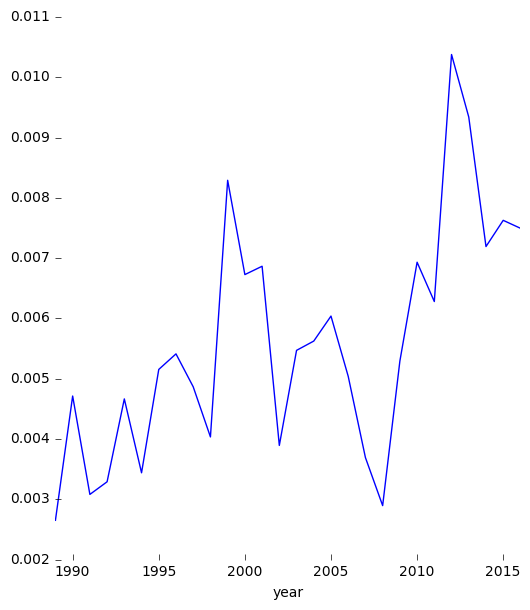

In [275]:
groupedby_year['sex_ratio'].mean().plot(kind='line')
plt.show()


plt.figure(figsize=(6, 8))   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

## Analysis on Sex: 

As a general trend, sex has also become a more popularized lyric topic over time, though its relevance rates remain lower than the calculations associated with "money" and "power". Again, though we can only speculate, we believe that this trend has occurred due to rap and hip-hop entering the mainstream in the early 1990s. We believe that since then, lyrical topics have become increasingly commercialized and as the famous quip states, "sex sells". 

 ## Investigation of Anger

In [192]:
anger_dict = get_dict(dict_df, "anger")

In [193]:
lyrics_df['anger_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, anger_dict))

In [195]:
lyrics_df['anger_ratio'] = lyrics_df['anger_count'] / lyrics_df['token_count']

In [196]:
groupedby_year = lyrics_df.groupby('year')

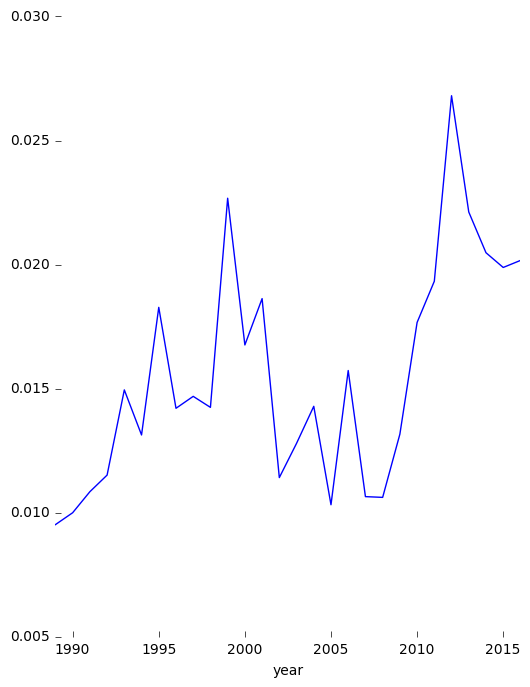

In [276]:
groupedby_year['anger_ratio'].mean().plot(kind='line')
plt.show()


plt.figure(figsize=(6, 8))   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

## Analysis on Anger: 

As a general trend, anger seems to have manifested as a fairly popular lyrical theme, as its rates are comparable to the high reference of power. Another interesting similarity the anger graph has to the graph on power is that 1999 emerges as a peak for both graphs. Furthermore, that the relevance substantially decreases from 2002-2007 and then sharply increases after that is an intriguing pattern.

 ## Investigation of Leisure

In [198]:
leisure_dict = get_dict(dict_df, "leisure")

In [199]:
lyrics_df['leisure_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, leisure_dict))

In [200]:
lyrics_df['leisure_ratio'] = lyrics_df['leisure_count'] / lyrics_df['token_count']

In [ ]:
groupedby_year = lyrics_df.groupby('year')

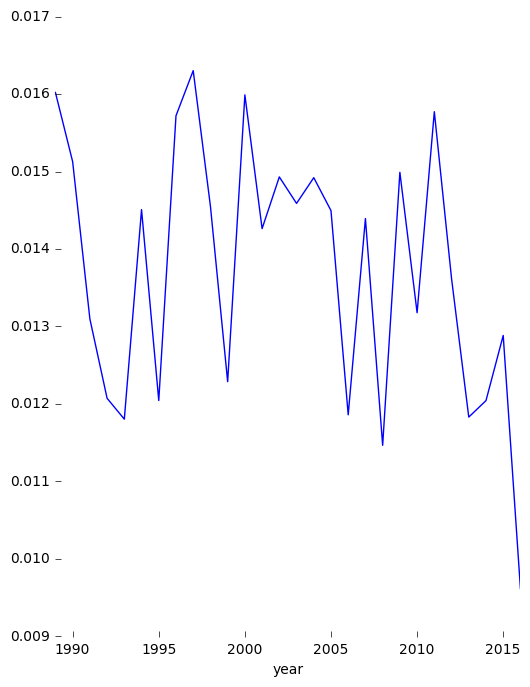

In [277]:
groupedby_year['leisure_ratio'].mean().plot(kind='line')
plt.show()

plt.figure(figsize=(6, 8))   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

## Analysis on Leisure: 

As a general trend leisure seems to have manifested as a fairly relevant lyrical theme, as its rates are comparably high in considering the other relevance scores. One interesting illustration is that references to leisure seem to have been high in the late 1980s but low in the past five years. Possible considerations for why the reference to leisure have faced recent decreases could be that the LIWC dictionary has not been updated to references to leisure that are specific to rap and hip-hop culture. For example, the dictionary includes certain liquors, but not those that are referenced as specific to rap and hip-hop culture. Nevertheless, in considering this graph as a whole it contradicts our hypothesis that lyrical evolution of hip-hop and rap have become increasingly superficial and materialistic after entering the mainstream. 

 ## Investigation of Swear Words

In [202]:
swear_dict = get_dict(dict_df, "swear")

In [205]:
lyrics_df['swear_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, swear_dict))

In [208]:
lyrics_df['swear_ratio'] = lyrics_df['swear_count'] / lyrics_df['token_count']

In [209]:
groupedby_year = lyrics_df.groupby('year')

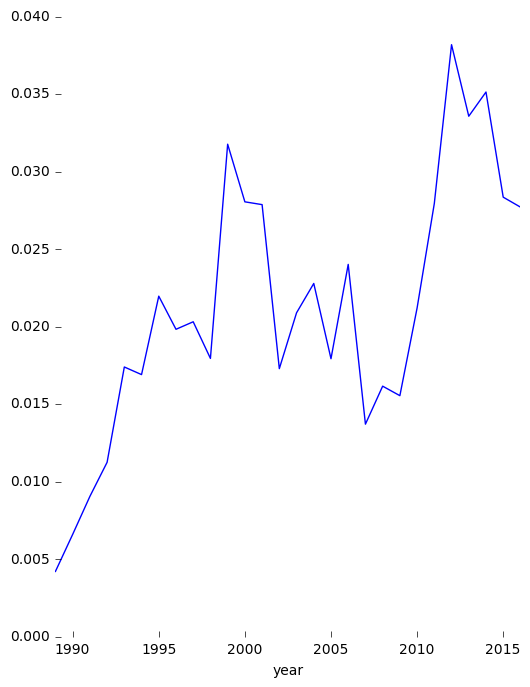

In [278]:
groupedby_year['swear_ratio'].mean().plot(kind='line')
plt.show()


plt.figure(figsize=(6, 8))   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

In [ ]:
get_similar_words(2015, 'woman', 20)

pet grammy undercover virgin mall reason road house prescription perc
placemat vacay preacher parachute coffin feature fuck year dj fade


## Analysis on Swear Words: 

It is interesting to see that the use of swear words is following an almost linear increase in relevance over time. We interpret this graph to be in accordance with our hypothesis as we believe an increase in swear words to be indicative of an increase in meaningless content and colloquial rhetoric. Furthermore, we find that the range of relevance is fairly unusual in this graph in comparison to others, as scores range from 0.005 - 0.04.

 ## Investigation on Insight

In [204]:
insight_dict = get_dict(dict_df, "insight")

In [207]:
lyrics_df['insight_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, insight_dict))

In [214]:
lyrics_df['insight_ratio'] = lyrics_df['insight_count'] / lyrics_df['token_count']

In [215]:
groupedby_year = lyrics_df.groupby('year')

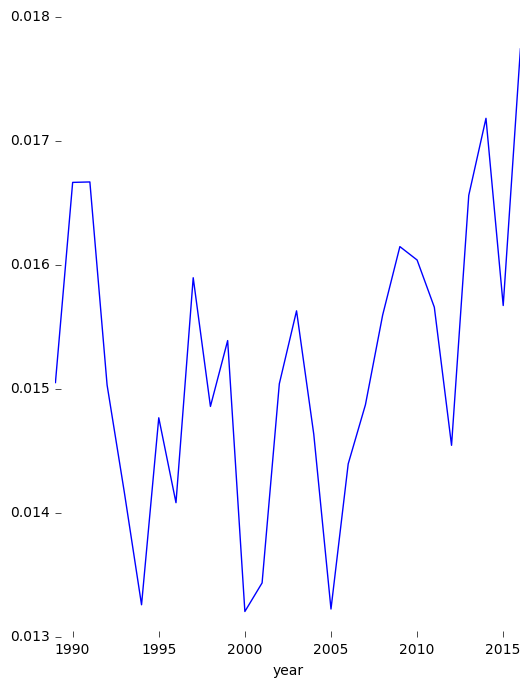

In [280]:
groupedby_year['insight_ratio'].mean().plot(kind='line')
plt.show()

plt.figure(figsize=(6, 8))   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

## Analysis on Insight: 

Here we see another interesting graph that does not support out hypothesis. As a whole, insight seems to manifests a fairly relevant lyrical topic, though it is interesting to note that it peaks at in the early 1990s with the emergence of gangster rap and in the last five years. One speculation we can make from such a trend is that rap and hip-hop first entered the mainstream as a reflection on the black American experience, that this eventually lost popularity as a topic, but that we are now seeing a revival of such reflection. 

# III. Overview Analysis on Intersectionality of Themes

Our hypothesis dictated certain expectations for how LIWC dictionaries would validate changes in rap and hip-hop lyrical themes as the genre entered the mainstream. We believed that would see increases in the lyrical reference to money, sex, leisure, and swear words. Furthermore, we believed that by entering the mainstream, commentary and reflection on meaningful experiences would decrease. To validate this, we expected the lyrical reference to power, anger, and insight to decrease. 

What we found was that there has been increasing reference to money, sex, anger, and swear words. No topics have been experiencing a decreasing reference. Otherwise, lyrical references to insight, leisure, and power have remained relatively stable, though do experience aggressive variation year to year. 

Another notable intersectionality is that some year share similar peaks and valleys. For examples the year 2008 saw drops in power, sex, and leisure. Could this have been a product of the housing crisis? Another example is that in 2003, we saw major drops in reference to money, power, sex, and anger but major gains in insight. Could this have been a response to the 9/11 attacks and War on Terror? Further analysis is needed. 

# Conclusion: 

We believe that through the means we have chosen to interpret our data our hypothesis (that rap and hip-hop lyrics have shifted to more relay more commercialized sentiments) is supported. We originally stated that we believed that we will see a trend in lyrical content pivoting from the iteration of black American experience to conventional themes in popular music such as love/sex, fame, and status/power. This hypothesis manifests as we note that trends in reference to money, sex, anger, and swear words are gradually increasing. Nevertheless, our hypothesis is not 100% supported as the commercialized sentiment of leisure has stayed relatively stable, along with the other topics of power, anger, and insight that we expected to decrease. Furthermore, it is important to reiterate that much of the methods that we relied on are subject to personal analysis. As we referenced in the insight analysis, it is possible that rap and hip-hop are under going revival in encorporating personal reflections and expressions of reality into their lyrics. 


Taking this into consideration, one of our biggest takeaways is that though there seem to be general trends of increased consumerism, the variation in years can be strikingly subjective to change. For example, in the "Insights" graph we see stark peaks and valleys that are almost exclusively contained within singular years. We interpret this finding to be a product of sociological influences and we believe that there is much potential for further investigation into why we see such variation year to year. We attempted to do some of this investigation by applying similar and concordance functions to the year 2013, as it stood out in both the money and power graphs as an interesting variable. Our intent was to survey if the Black Lives Matter movement had caused a lyrical shift from increasing refernce of money to increasing reference of power. We believe that future iterations of this project could benefit from an anthropological approach similar to the documentary "Hip-Hop Evolution" that traces notable thematic changes through interviews and other more qualitative data. 


## Limitations 

- Subjective creation of LIWC dictionaries
- Bias application/interpretation of LIWC dictionaries
- Bias interpretation of topic modeling (influenced by preconceptions from previous research)
- Bias interpretation of graphs of lyrical references 
- Rap and hip-hop have many colloquialisms that may not have been accounted for 
- We could have overlooked certain sociological influence that caused such fluctuations 

## Future Computational Steps

If we had more time there are several directions we would take this project in. Some of the ideas that we are interested in pursuing include:

- See how trends in the themes we have identified in mainstream rap and hip-hop have been reflected in other popular genres, are they affected by the same sociological events
- See how trends in the themes we have identified are mediated by technological innovations in rap and hip-hop
- Use the concordance function to look at specific lyrics in order to validate the specific referenced sociological associations 
- It would be interesting to plot trends that compare to negative emotions to patterns of money and power, and how they overlap with our proposed sociological explanations 
- Addressing some of the limitations we cited above through extended computational analysis 
- Created graphs that would compare all the topics on one axis 
- Create chi-square scores for specific songs and compared them

# Work Cited 

- Amadeo, K. (2017, April 07). Stock Market Crash of 2008. Retrieved May 07, 2017, from https://www.thebalance.com/stock-market-crash-of-2008-3305535

- CNN, & Reuters. (Aug 26, 2004). Census Bureau says 1.3 million more Americans in poverty. Retrieved May 07, 2017, from http://money.cnn.com/2004/08/26/news/economy/poverty_survey/

- Cullors, P., Garza, A., & Tometi, O. (n.d.) About the Black Lives Matter Network. Retrieved May 08, 2017, from http://blacklivesmatter.com/about/. 

- Graaf, G. & Ratliff, A. (2017). Social Welfare Policy, SW 112. Lecture presented in McCone Hall, at University of California, Berkeley. 

- Kabango, S. (Director). (2016, September 4). Hip-Hop Evolution [Video file]. Retrieved May 5, 2017, from http://hiphopevolution.com/pages/about-the-series/

- Lichtblau, E. (2016, September 17). Hate Crimes Against American Muslims Most Since Post-9/11 Era. Retrieved May 08, 2017, from https://www.nytimes.com/2016/09/18/us/politics/hate-crimes-american-muslims-rise.html

- Roberts, J. (2002, September 04). Plans For Iraq Attack Began On 9/11. Retrieved May 08, 2017, from http://www.cbsnews.com/news/plans-for-iraq-attack-began-on-9-11/

- Schuelke, R. (2003, December 30). Timeline of Key Economic Events in 2003. Retrieved May 07, 2017, from http://www.sonic.net/~schuelke/EconomicEvents2003.html

- Graham, J. (2016). What Happened in 2010. Retrieved May 07, 2017, from http://www.onthisday.com/date/2010